### Welch's t test
* To evaluate leakage, the test compares two datasets, possibly of differing sizes and standard deviations, to see if they show statistically significant differences.
* Subset A and B, computer the t-statistic trace T (over at the same time instant) as 

$$\frac{{X}_{A}-{X}_{B}}{\sqrt{\frac{{S}_{A}^2}{{N}_{A}}+\frac{{S}_{B}^2}{{N}_{B}}}}$$
    
* ${X}_{A}$ is the average of all traces in group A (fixed data)
* ${X}_{B}$ is the average of all traces in group B (random data)
* ${S}_{A}$ is the sample standard deviation of all traces in group A (fixed data)
* ${S}_{B}$ is the sample standard deviation of all traces in group B (random data)

If for a given test the same time point in both of data sets exceeds ±4.5 standard deviations, the device is leaking data related sensitive parameters.

# Fixed vs. Rand Data

In [103]:
from tqdm.notebook import trange
import numpy as np

In [104]:
N = 100000

In [105]:
text_arrays_A = np.array_split(np.fromfile("../Downloads/fixed_random_data _ round_6_18000_samples/text_arrays_groupA_fixed_100k.bin", dtype=np.uint8), N)

In [106]:
text_arrays_B = np.array_split(np.fromfile("../Downloads/fixed_random_data _ round_6_18000_samples/text_arrays_groupB_random_100k.bin", dtype=np.uint8), N)

In [107]:
N = 50000

In [108]:
traces_enc_A_1 = np.array(np.array_split(np.fromfile("../Downloads/fixed_random_data _ round_6_18000_samples/traces_enc_groupA_part_1_fixed_50k.bin", dtype=np.float64), N))

In [109]:
traces_enc_A_2 = np.array(np.array_split(np.fromfile("../Downloads/fixed_random_data _ round_6_18000_samples/traces_enc_groupA_part_2_fixed_50k.bin", dtype=np.float64), N))

In [110]:
traces_enc_B_1 = np.array(np.array_split(np.fromfile("../Downloads/fixed_random_data _ round_6_18000_samples/traces_enc_groupB_part_1_50k.bin", dtype=np.float64), N))

In [111]:
traces_enc_B_2 = np.array(np.array_split(np.fromfile("../Downloads/fixed_random_data _ round_6_18000_samples/traces_enc_groupB_part_2_50k.bin", dtype=np.float64), N))

In [112]:
group1 = np.append(traces_enc_A_1, traces_enc_A_1, axis=0)

In [113]:
group2 = np.append(traces_enc_B_1, traces_enc_B_1, axis=0)

In [140]:
import scipy.stats as stats

In [124]:
res = stats.ttest_ind(group1, group2, equal_var=True)
display(res)

Ttest_indResult(statistic=array([-250.01542854, -293.15772678, -331.20562809, ..., -108.15061518,
       -116.23602032, -111.58404284]), pvalue=array([0., 0., 0., ..., 0., 0., 0.]))

In [135]:
res = stats.ttest_ind(group2, group1, equal_var=True)
display(res)

Ttest_indResult(statistic=array([250.01542854, 293.15772678, 331.20562809, ..., 108.15061518,
       116.23602032, 111.58404284]), pvalue=array([0., 0., 0., ..., 0., 0., 0.]))

In [136]:
t_vall = float("{0:.2f}".format(np.max(abs(res.statistic))))

In [137]:
print(t_vall)

1021.08


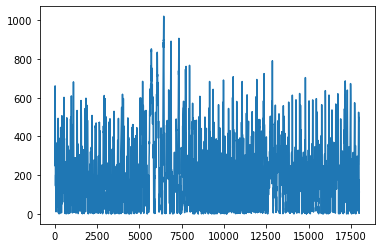

In [138]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot(abs(res.statistic))
plt.show()

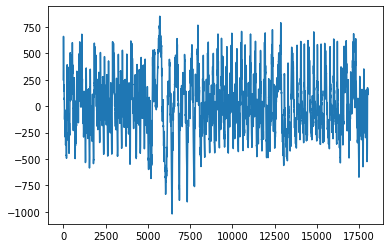

In [139]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot(res.statistic)
plt.show()

# Rand vs. Rand Data

In [19]:
N = 200000

In [20]:
textins = np.array_split(np.fromfile("../Downloads/pt_RvR_200k.bin", dtype=np.uint8), N)

In [66]:
N = 50000

In [38]:
wave_1 = np.array_split(np.fromfile("../Downloads/t_RvR_200k_1.bin", dtype=np.float64), N)

In [40]:
wave_2 = np.array_split(np.fromfile("../Downloads/t_RvR_200k_2.bin", dtype=np.float64), N)

In [67]:
wave_3 = np.array_split(np.fromfile("../Downloads/t_RvR_200k_3.bin", dtype=np.float64), N)

In [75]:
wave_4 = np.array_split(np.fromfile("../Downloads/t_RvR_200k_4.bin", dtype=np.float64), N)

In [83]:
waves_11 = np.append(wave_1, wave_2, axis=0)

In [84]:
waves_22 = np.append(wave_3, wave_4, axis=0)

In [85]:
waves = np.append(waves_11, waves_22, axis=0)

In [143]:
res = stats.ttest_ind(waves_11, waves_22, equal_var=True)
display(res)

Ttest_indResult(statistic=array([ 0.73035581,  1.02698055,  2.7402885 , ..., -2.01262503,
       -0.71842537, -2.0231427 ]), pvalue=array([0.46517358, 0.30443086, 0.00613907, ..., 0.04415543, 0.47249589,
       0.04305976]))

In [144]:
t_vall = float("{0:.2f}".format(np.max(abs(res.statistic))))

In [145]:
print(t_vall)

5.72


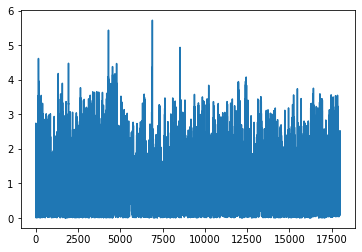

In [146]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot(abs(res.statistic))
plt.show()

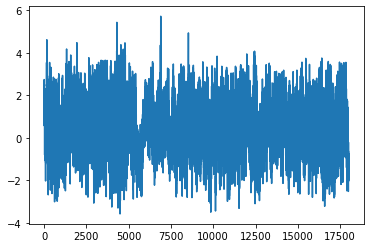

In [147]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot(res.statistic)
plt.show()

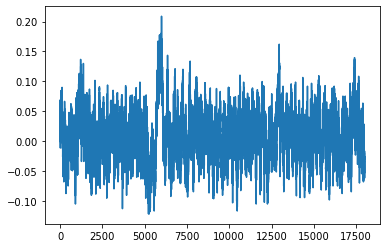

In [154]:
import matplotlib.pyplot as plt 
plt.figure()
plt.plot(waves_11[0])
plt.show()

In [155]:
from statsmodels.stats.weightstats import ttest_ind

ans = ttest_ind(waves_11, waves_22)

In [156]:
ans

(array([ 0.73035581,  1.02698055,  2.7402885 , ..., -2.01262503,
        -0.71842537, -2.0231427 ]),
 array([0.46517358, 0.30443086, 0.00613907, ..., 0.04415543, 0.47249589,
        0.04305976]),
 199998.0)

In [161]:
t_vall = float("{0:.2f}".format(np.max(abs(ans[0]))))

In [162]:
print(t_vall)

5.72
